In [1]:
#progress for now - no, not a final!

In [2]:
%pylab inline
from pyndamics3 import Simulation
from sci378 import *

Populating the interactive namespace from numpy and matplotlib
pyndamics3  version  0.0.28
Version:  0.0.18


In [3]:
data=pd.read_csv('fishdata.csv')
data=data[data['LANDINGS']=='LAND_TOTAL']
data=data[data['MEASURE']=='TON']
data=data[data['SPECIES']=='KCR']
data

,COUNTRY,Country,LANDINGS,Marine landings,SPECIES,Species,MEASURE,Measure,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
615,CHL,Chile,LAND_TOTAL,TOTAL LANDINGS,KCR,Southern king crab [Lithodes santolla],TON,Tonne,2008,2008,TONNE,Tonnes,0,Units,NaN,NaN,3241.0,NaN,NaN
616,CHL,Chile,LAND_TOTAL,TOTAL LANDINGS,KCR,Southern king crab [Lithodes santolla],TON,Tonne,2009,2009,TONNE,Tonnes,0,Units,NaN,NaN,3022.0,NaN,NaN
617,CHL,Chile,LAND_TOTAL,TOTAL LANDINGS,KCR,Southern king crab [Lithodes santolla],TON,Tonne,2010,2010,TONNE,Tonnes,0,Units,NaN,NaN,3441.0,NaN,NaN
618,CHL,Chile,LAND_TOTAL,TOTAL LANDINGS,KCR,Southern king crab [Lithodes santolla],TON,Tonne,2011,2011,TONNE,Tonnes,0,Units,NaN,NaN,5676.0,NaN,NaN
619,CHL,Chile,LAND_TOTAL,TOTAL LANDINGS,KCR,Southern king crab [Lithodes santolla],TON,Tonne,2012,2012,TONNE,Tonnes,0,Units,NaN,NaN,6490.0,NaN,NaN
620,CHL,Chile,LAND_TOTAL,TOTAL LANDINGS,KCR,Southern king crab [Lithodes santolla],TON,Tonne,2013,2013,TONNE,Tonnes,0,Units,NaN,NaN,5743.0,NaN,NaN
621,CHL,Chile,LAND_TOTAL,TOTAL LANDINGS,KCR,Southern king crab [Lithodes santolla],TON,Tonne,2014,2014,TONNE,Tonnes,0,Units,NaN,NaN,6207.0,NaN,NaN
622,CHL,Chile,LAND_TOTAL,TOTAL LANDINGS,KCR,Southern king crab [Lithodes santolla],TON,Tonne,2015,2015,TONNE,Tonnes,0,Units,NaN,NaN,5760.0,NaN,NaN
623,CHL,Chile,LAND_TOTAL,TOTAL LANDINGS,KCR,Southern king crab [Lithodes santolla],TON,Tonne,2016,2016,TONNE,Tonnes,0,Units,NaN,NaN,5583.0,NaN,NaN
624,CHL,Chile,LAND_TOTAL,TOTAL LANDINGS,KCR,Southern king crab [Lithodes santolla],TON,Tonne,2017,2017,TONNE,Tonnes,0,Units,NaN,NaN,5022.0,NaN,NaN


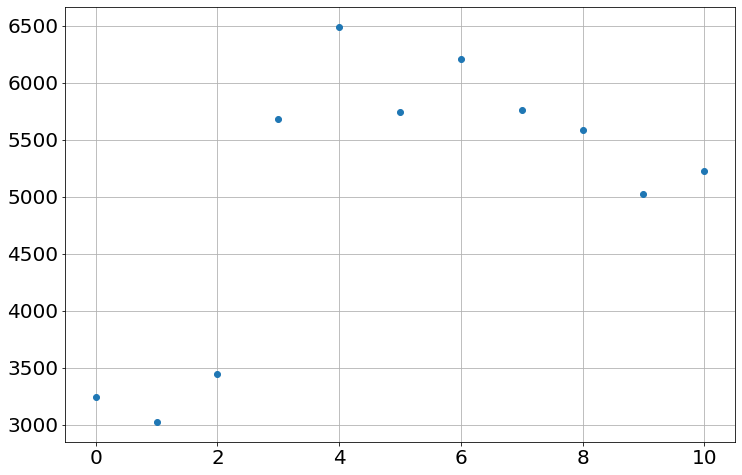

In [4]:
t_data=data['Year']
x_data=data['Value']
t_data=t_data-min(t_data)

plot(t_data,x_data,'o')

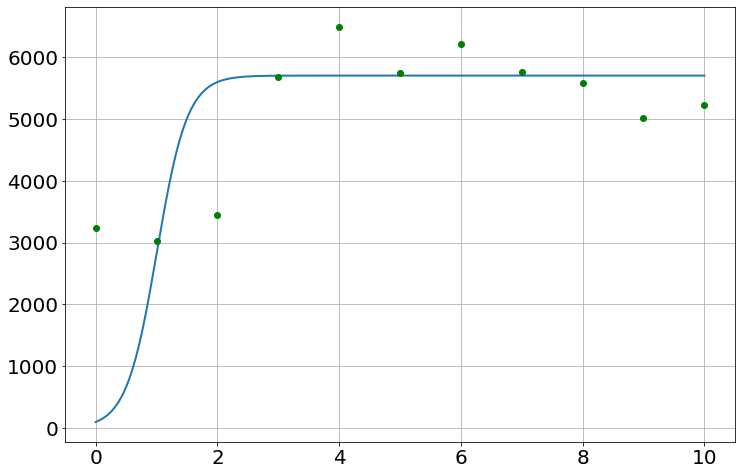

In [5]:
sim=Simulation()
sim.add("N'=r*N*(1-N/K)-H*(N/(A+N))",100)
sim.params(r=4,K=5700,H=1,A=2000)
sim.run(10)

plot(sim.t,sim.N)
plot(t_data,x_data,'go')

In [6]:
#after a long derivation, I found N=(-1+A)+/sqrt[((1+A)^2-4(HK/r -A)] all /2

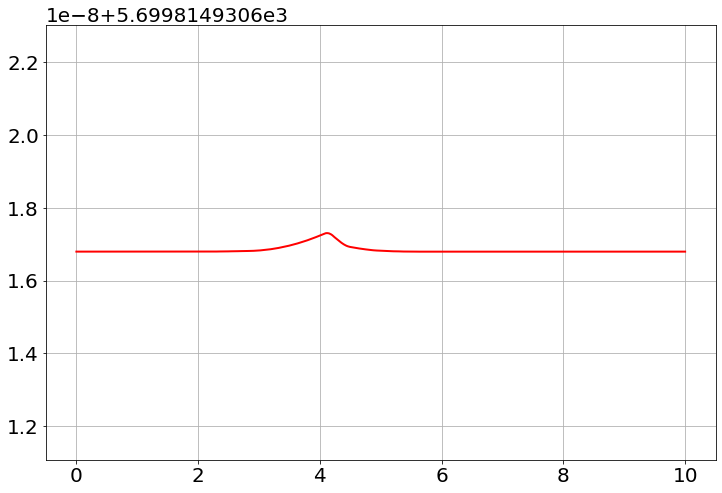

In [7]:
#fixed point
j=(5700-2000)
k=((3700)**2-4*(5700/4-2000*5700))**.5
l=(j+k)/2
sim=Simulation()
sim.add("N'=r*N*(1-N/K)-H*(N/(A+N))",l)
sim.params(r=4,K=5700,H=1,A=2000)
sim.run(10)

plot(sim.t,sim.N,'r')

In [8]:
print(l)

5699.814930616795


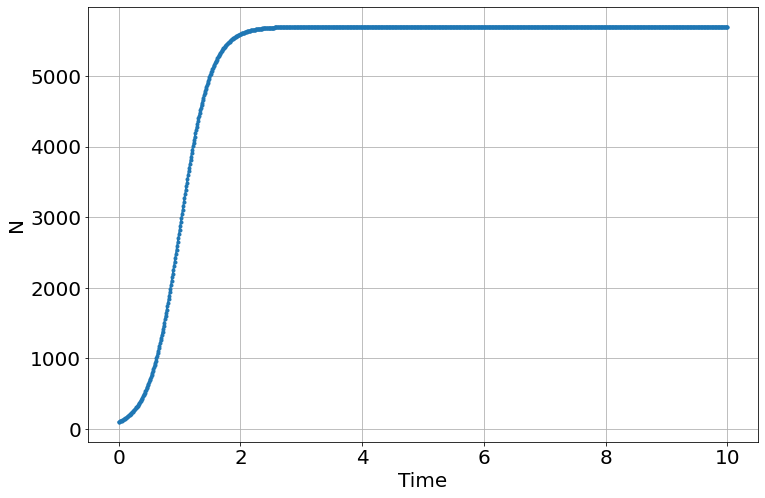

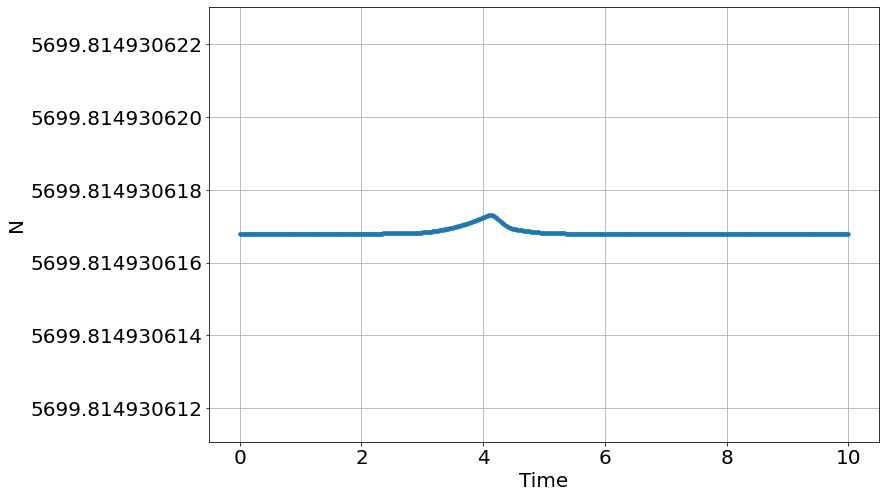

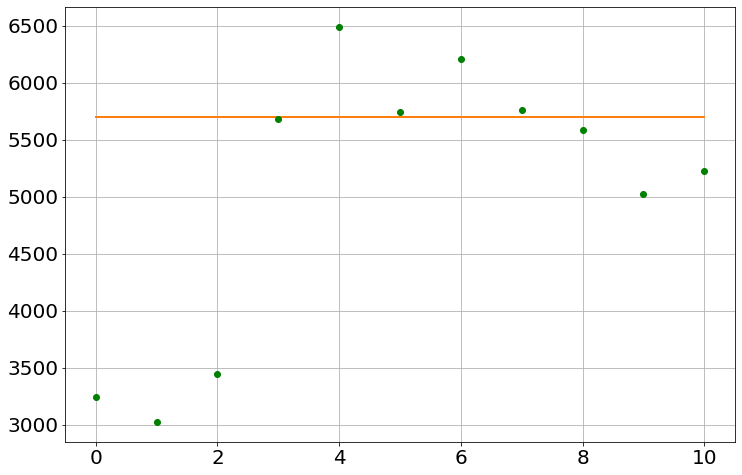

In [9]:
sim=Simulation()
sim.add("N'=r*N*(1-N/K)-H*(N/(A+N))",100,plot=1)
#sim.add("N'=r*N*(1-N/K)-H*(N/(A+N))",l,plot=1)
sim.params(r=4,K=5700,H=1,A=2000)
sim.run(10)

sim=Simulation()
#sim.add("N'=r*N*(1-N/K)-H*(N/(A+N))",100,plot=1)
sim.add("N'=r*N*(1-N/K)-H*(N/(A+N))",l,plot=1)
sim.params(r=4,K=5700,H=1,A=2000)
sim.run(10)

plot(sim.t,sim.N)
plot(sim.t,sim.N)
plot(t_data,x_data,'go')

In [10]:
l=float(l)
for dN/dt in [100,l]:
    sim=Simulation()
    sim.add("N'=r*N*(1-N/K)-H*(N/(A+N))",dN/dt)
    sim.params(r=4,K=5700,H=1,A=2000)
    sim.run(10)

plot(sim.t,sim.Np)
plot(t_data,x_data,'go')

SyntaxError: cannot assign to operator (Temp/ipykernel_53300/298254513.py, line 2)

In [ ]:
sim=Simulation()
sim.add("N'=r*N*(1-N/K)-H*(N/(A+N))",100,plot=1)
sim.add("W'=r*W(1-W/K)-H*(W/(A+W))",l,plot=1)
sim.params(r=4,K=5700,H=1,A=2000)
sim.run(10)

plot(sim.t,sim.N)
plot(sim.t,sim.W)
#plot(t_data,x_data,'go')

Text(0, 0.5, 'Fish Catching Rate')

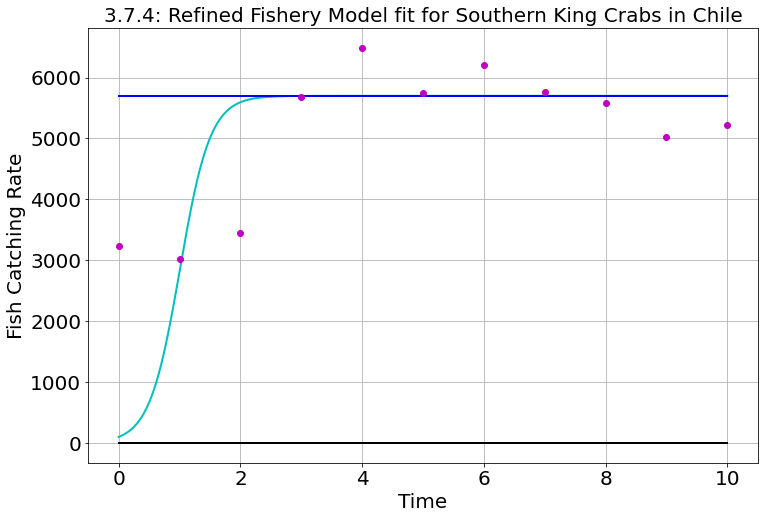

In [12]:
sim=Simulation()
sim.add("N'=r*N*(1-N/K)-H*(N/(A+N))",100)
sim.params(r=4,K=5700,H=1,A=2000)
sim.run(10)

plot(sim.t,sim.N,'c-')

sim=Simulation()
sim.add("N'=r*N*(1-N/K)-H*(N/(A+N))",l)
sim.params(r=4,K=5700,H=1,A=2000)
sim.run(10)
plot(sim.t,sim.N,'b-')


sim=Simulation()
sim.add("N'=r*N*(1-N/K)-H*(N/(A+N))",0)
sim.params(r=4,K=5700,H=1,A=2000)
sim.run(10)
plot(sim.t,sim.N,'k-')

plot(t_data,x_data,'mo')
title('3.7.4: Refined Fishery Model fit for Southern King Crabs in Chile')
xlabel('Time')
ylabel('Fish Catching Rate')

In [ ]:
#do another fixed point for N=0